In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter

import os

import data_extraction as da
import plotting
import utils

utils.ensure_dir_exists(plotting.output_dir)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/eye4got/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
trans_df = pd.read_parquet(da.all_transcripts_df_dir)
subs_df = pd.read_parquet(da.sub_df_dir)

subs_df['movie'] = subs_df['movie'].str.title()
trans_df['movie_name'] = trans_df['movie_name'].str.title()

filtered_subs_df = subs_df[subs_df.movie.isin(trans_df['movie_name'].unique())]

In [ ]:
def process_text(text: str, excl_stopwords: bool):
    
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word.isalpha()]
    if excl_stopwords:
        filtered_tokens = [word for word in filtered_tokens if word not in stop_words]
        
    return filtered_tokens

def get_ngram_counts(text, n, top_n=10, excl_stopwords: bool = True):
    
    tokens = process_text(text, excl_stopwords)
    ngram_list = list(ngrams(tokens, n))
    ngram_counts = Counter(ngram_list)
    ngram_df = pd.DataFrame(ngram_counts.most_common(top_n), columns=['Ngram', 'Frequency'])
    ngram_df['Ngram'] = ngram_df['Ngram'].apply(lambda x: ' '.join(x))
    
    return ngram_df

def plot_ngrams(ngram_df: pd.DataFrame, title: str, output_path: str):
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Frequency', y='Ngram', data=ngram_df)
    plt.title(title, fontsize=20)
    plt.xlabel("Frequency", fontsize=20)
    plt.ylabel("")
    plt.xticks(fontsize=20)
    plt.yticks(rotation=45, fontsize=20)  # Rotate y-ticks and adjust fontsize
    plt.tight_layout()
    plt.savefig(output_path)

In [ ]:
red_trans_df = trans_df[trans_df.text.ne(' Thank you.')]

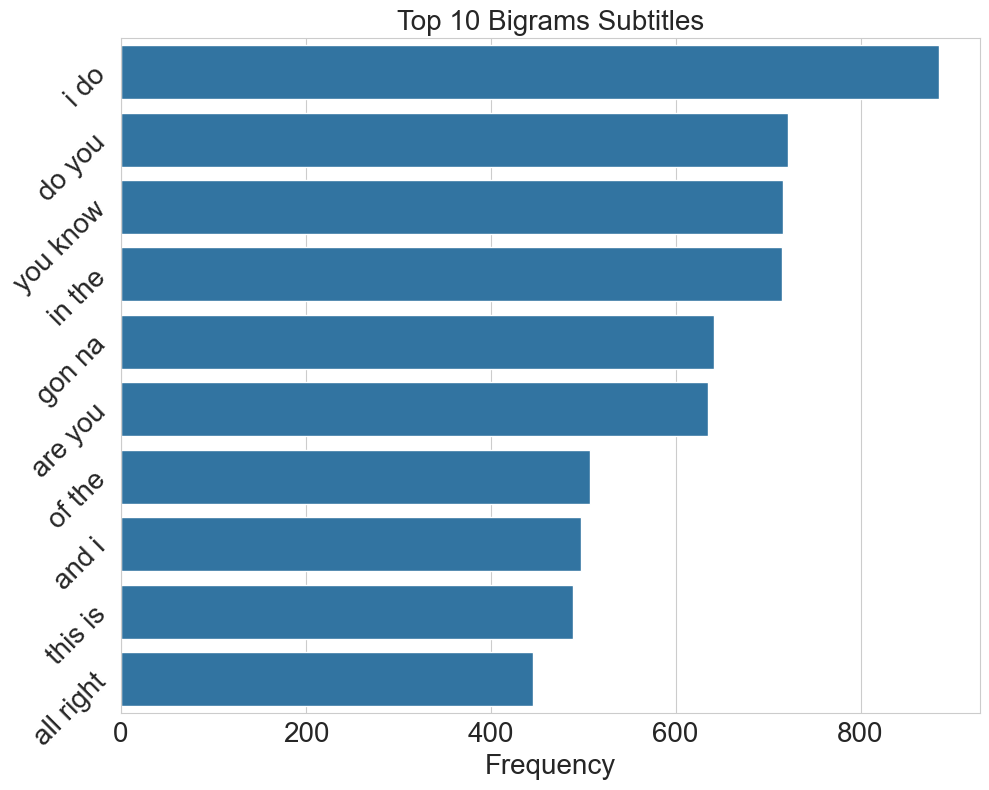

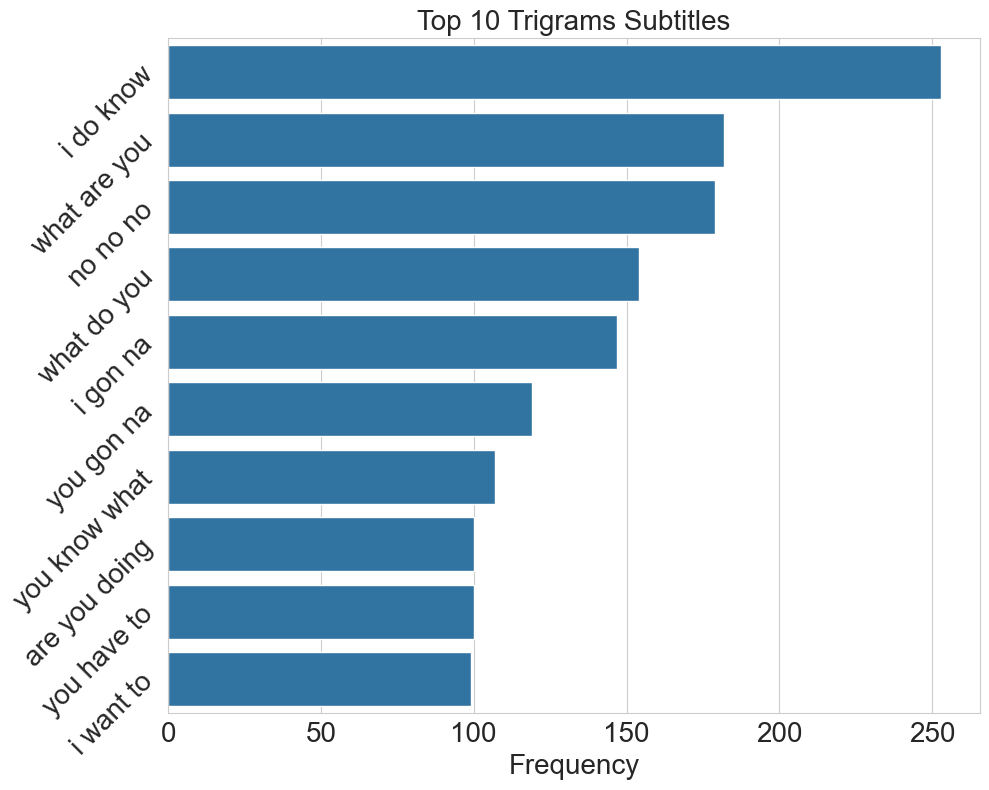

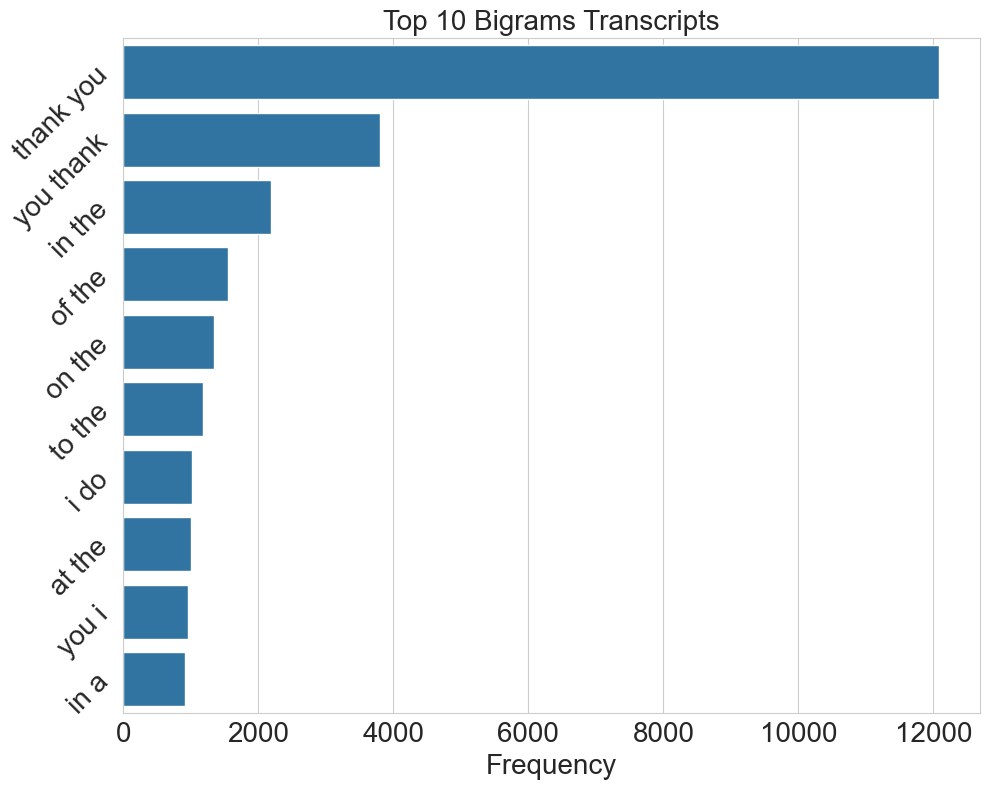

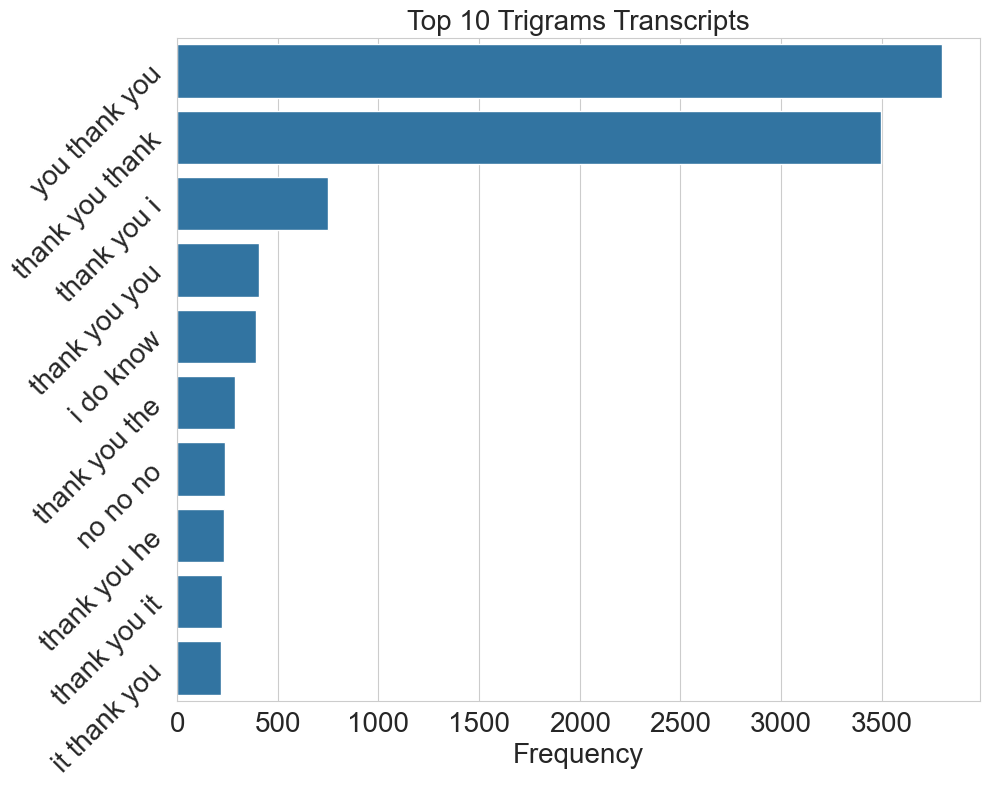

In [31]:
subs_text = ' '.join(filtered_subs_df.raw_dialogue)
trans_text = ' '.join(trans_df.text)
dataset = {'Subtitles': subs_text, 'Transcripts': trans_text}

# dialogue_df = trans_df[trans_df.is_dialogue.eq(False)]
# narration_df = trans_df[trans_df.is_dialogue.eq(True)]

# dataset = {'Dialogue': ' '.join(dialogue_df.text), 'Narration': narration_df.text}

excl_stopwords = False

for title, text in dataset.items():
    bigram_df = get_ngram_counts(text, 2, excl_stopwords=excl_stopwords)
    trigram_df = get_ngram_counts(text, 3, excl_stopwords=excl_stopwords)

    bigram_title = f'Top 10 Bigrams {title}'
    trigram_title = f'Top 10 Trigrams {title}'

    bigram_output_path = os.path.join(plotting.output_dir, f'{title}_bigrams.png')
    trigram_output_path = os.path.join(plotting.output_dir, f'{title}_trigrams.png')

    plot_ngrams(bigram_df, title=bigram_title, output_path=bigram_output_path)
    plot_ngrams(trigram_df, title=trigram_title, output_path=trigram_output_path)